In [ ]:
#Data Preprocessing
import pandas as pd
from sklearn.model_selection import train_test_split

# 1. Load the dataset
data = pd.read_csv("medical_insurance.csv")

# 2. Inspect the data
print("First 5 rows:\n", data.head())
print("\nData shape:", data.shape)
print("\nMissing values:\n", data.isnull().sum())

# 3. Encode categorical variables using One-Hot Encoding
# XGBoost can handle raw numeric features, but categorical variables must be encoded
data_encoded = pd.get_dummies(data, columns=['sex', 'smoker', 'region'], drop_first=True)

# 4. Split features and target
X = data_encoded.drop('charges', axis=1)
y = data_encoded['charges']

# 5. Train-test split (80%-20%)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("\nTraining set shape:", X_train.shape)
print("Test set shape:", X_test.shape)
print("\nPreprocessing complete.")

First 5 rows:
    age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520

Data shape: (2772, 7)

Missing values:
 age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Training set shape: (2217, 8)
Test set shape: (555, 8)

Preprocessing complete.


First 5 rows:
    age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520

Data shape: (2772, 7)

Data types:
 age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

Missing values:
 age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Summary statistics:
                age          bmi     children       charges
count  2772.000000  2772.000000  2772.000000   2772.000000
mean     39.109668    30.701349     1.101732  13261.369959
std      14.081459     6.129449     1.214806  12151.768945
min      18.000000    1

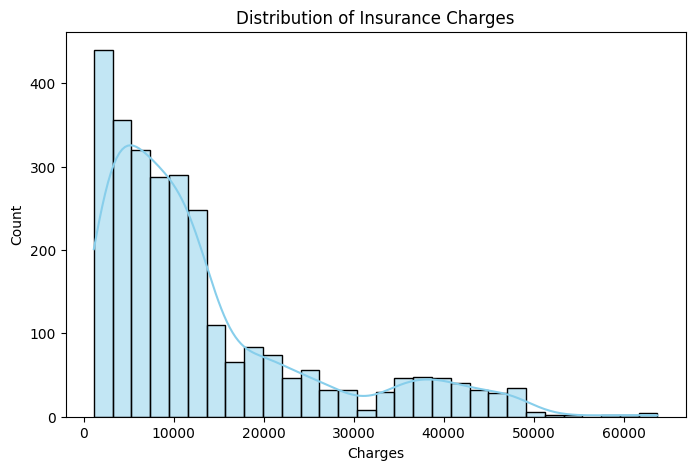

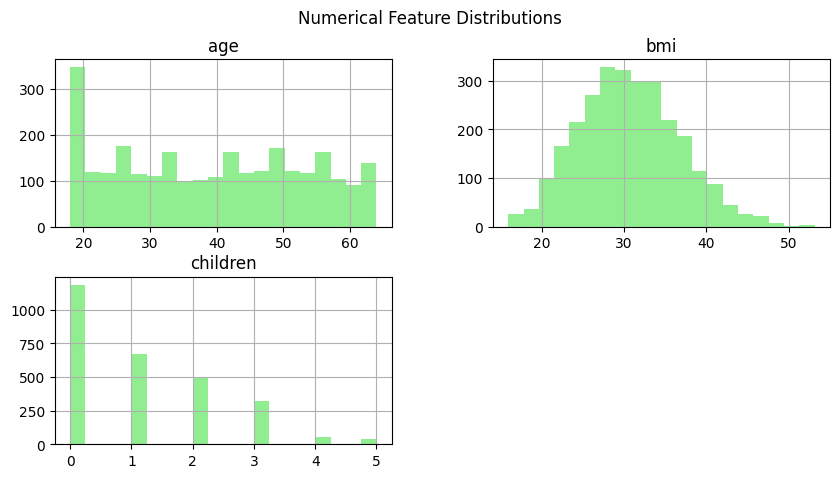

C:\Users\minig\AppData\Local\Temp\ipykernel_11536\855747357.py:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=data, palette='Set2')


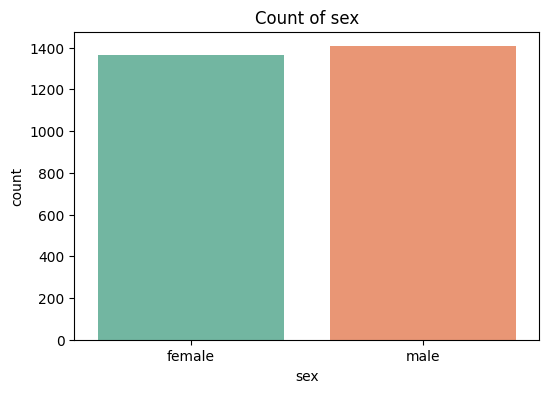

C:\Users\minig\AppData\Local\Temp\ipykernel_11536\855747357.py:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=data, palette='Set2')


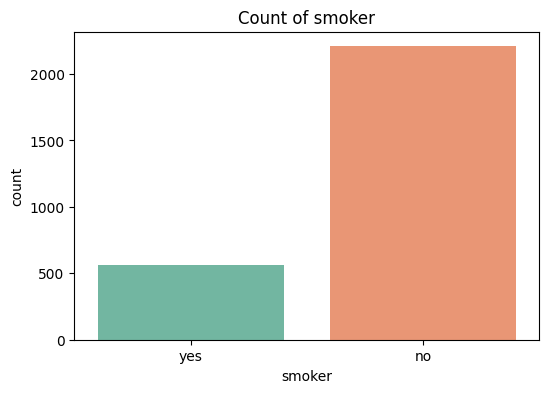

C:\Users\minig\AppData\Local\Temp\ipykernel_11536\855747357.py:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=data, palette='Set2')


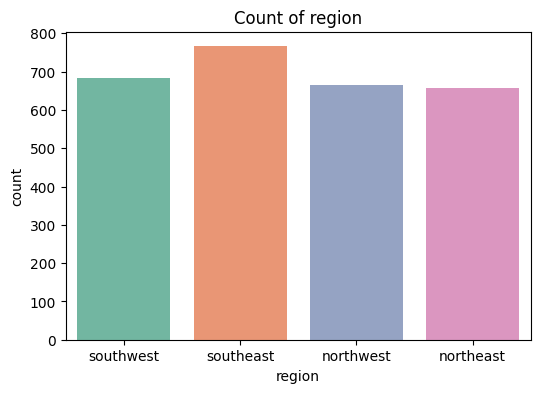

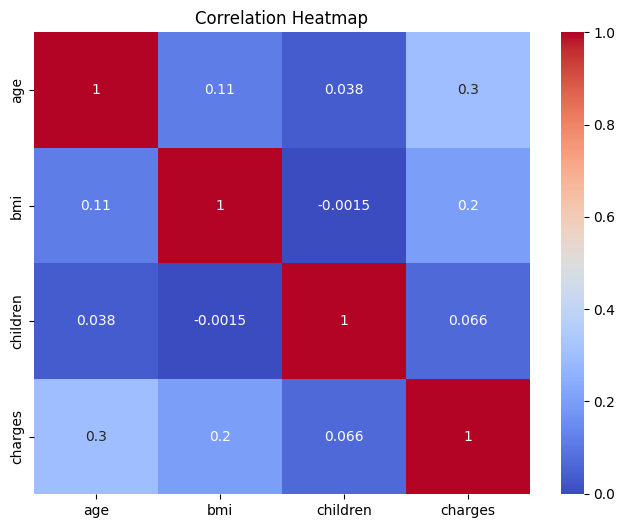

C:\Users\minig\AppData\Local\Temp\ipykernel_11536\855747357.py:59: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='smoker', y='charges', data=data, palette='Set3')


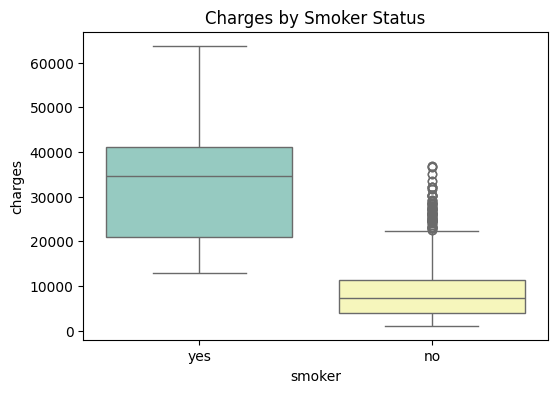

C:\Users\minig\AppData\Local\Temp\ipykernel_11536\855747357.py:65: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='region', y='charges', data=data, palette='Set1')


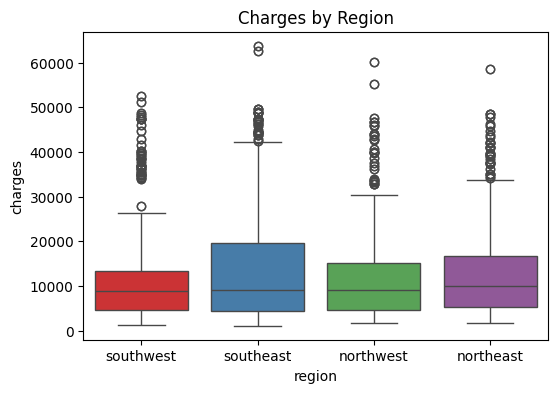

In [3]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv("medical_insurance.csv")

# -------------------------------
# 1. Inspect dataset
# -------------------------------
print("First 5 rows:\n", data.head())
print("\nData shape:", data.shape)
print("\nData types:\n", data.dtypes)
print("\nMissing values:\n", data.isnull().sum())
print("\nSummary statistics:\n", data.describe())

# -------------------------------
# 2. Distribution of target variable 'charges'
# -------------------------------
plt.figure(figsize=(8,5))
sns.histplot(data['charges'], kde=True, bins=30, color='skyblue')
plt.title("Distribution of Insurance Charges")
plt.xlabel("Charges")
plt.ylabel("Count")
plt.show()

# -------------------------------
# 3. Distribution of numerical features
# -------------------------------
num_features = ['age', 'bmi', 'children']
data[num_features].hist(bins=20, figsize=(10,5), color='lightgreen')
plt.suptitle("Numerical Feature Distributions")
plt.show()

# -------------------------------
# 4. Count plots for categorical features
# -------------------------------
cat_features = ['sex', 'smoker', 'region']
for col in cat_features:
    plt.figure(figsize=(6,4))
    sns.countplot(x=col, data=data, palette='Set2')
    plt.title(f"Count of {col}")
    plt.show()

# -------------------------------
# 5. Correlation heatmap (numerical features only)
# -------------------------------
plt.figure(figsize=(8,6))
sns.heatmap(data[num_features + ['charges']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

# -------------------------------
# 6. Charges vs Categorical Features
# -------------------------------
# Charges vs Smoker
plt.figure(figsize=(6,4))
sns.boxplot(x='smoker', y='charges', data=data, palette='Set3')
plt.title("Charges by Smoker Status")
plt.show()

# Charges vs Region
plt.figure(figsize=(6,4))
sns.boxplot(x='region', y='charges', data=data, palette='Set1')
plt.title("Charges by Region")
plt.show()


In [4]:
# -------------------------------
# Step 2: Train Individual Models (Full Corrected Code)
# -------------------------------

# Import required libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# -------------------------------
# 1. Load Dataset
# -------------------------------
data = pd.read_csv("medical_insurance.csv")

# -------------------------------
# 2. Encode Categorical Variables
# -------------------------------
data_encoded = pd.get_dummies(data, columns=['sex', 'smoker', 'region'], drop_first=True)

# Split features and target
X = data_encoded.drop('charges', axis=1)
y = data_encoded['charges']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Feature scaling (for ANN, SVR, KNN)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# -------------------------------
# 3. Helper function to evaluate models
# -------------------------------
def evaluate_model(y_true, y_pred, model_name):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    print(f"{model_name} - RMSE: {rmse:.2f}, MAE: {mae:.2f}, R2: {r2:.2f}")

# -------------------------------
# 4. Linear Regression
# -------------------------------
lr = LinearRegression()
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)
evaluate_model(y_test, lr_pred, "Linear Regression")

# -------------------------------
# 5. Random Forest Regressor
# -------------------------------
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
evaluate_model(y_test, rf_pred, "Random Forest")

# -------------------------------
# 6. Decision Tree Regressor
# -------------------------------
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)
evaluate_model(y_test, dt_pred, "Decision Tree")

# -------------------------------
# 7. Gradient Boosting Regressor
# -------------------------------
gbr = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
gbr.fit(X_train, y_train)
gbr_pred = gbr.predict(X_test)
evaluate_model(y_test, gbr_pred, "Gradient Boosting")

# -------------------------------
# 8. Support Vector Regressor (SVR)
# -------------------------------
svr = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=0.1)
svr.fit(X_train_scaled, y_train)
svr_pred = svr.predict(X_test_scaled)
evaluate_model(y_test, svr_pred, "Support Vector Regressor")

# -------------------------------
# 9. K-Nearest Neighbors Regressor (KNN)
# -------------------------------
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train_scaled, y_train)
knn_pred = knn.predict(X_test_scaled)
evaluate_model(y_test, knn_pred, "KNN Regressor")

# -------------------------------
# 10. Artificial Neural Network (ANN)
# -------------------------------
ann = Sequential()
ann.add(Input(shape=(X_train_scaled.shape[1],)))
ann.add(Dense(64, activation='relu'))
ann.add(Dense(32, activation='relu'))
ann.add(Dense(1))  # Output layer
ann.compile(optimizer='adam', loss='mean_squared_error')
ann.fit(X_train_scaled, y_train, epochs=100, batch_size=32, verbose=0)
ann_pred = ann.predict(X_test_scaled).flatten()
evaluate_model(y_test, ann_pred, "ANN")

# -------------------------------
# 11. XGBoost Regressor
# -------------------------------
xgb = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
xgb.fit(X_train, y_train)
xgb_pred = xgb.predict(X_test)
evaluate_model(y_test, xgb_pred, "XGBoost")


Linear Regression - RMSE: 6319.27, MAE: 4160.25, R2: 0.74
Random Forest - RMSE: 2756.58, MAE: 1281.18, R2: 0.95
Decision Tree - RMSE: 2791.92, MAE: 589.01, R2: 0.95
Gradient Boosting - RMSE: 4385.32, MAE: 2297.46, R2: 0.87
Support Vector Regressor - RMSE: 9359.83, MAE: 4445.90, R2: 0.43
KNN Regressor - RMSE: 5001.82, MAE: 2726.07, R2: 0.84
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
ANN - RMSE: 5935.09, MAE: 3754.92, R2: 0.77
XGBoost - RMSE: 3501.94, MAE: 1766.39, R2: 0.92


In [5]:
# -------------------------------
# Ensemble Stacking: RF + DT + XGBoost
# -------------------------------
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# 1. Base model predictions on the training set (for meta-model training)
# Use the training data to generate predictions for the meta-model
rf_train_pred = rf.predict(X_train)
dt_train_pred = dt.predict(X_train)
xgb_train_pred = xgb.predict(X_train)

# Stack the predictions as new features for the meta-model
stacked_train_features = np.column_stack((rf_train_pred, dt_train_pred, xgb_train_pred))

# 2. Base model predictions on the test set
rf_test_pred = rf.predict(X_test)
dt_test_pred = dt.predict(X_test)
xgb_test_pred = xgb.predict(X_test)
stacked_test_features = np.column_stack((rf_test_pred, dt_test_pred, xgb_test_pred))

# 3. Meta-model (Linear Regression)
meta_model = LinearRegression()
meta_model.fit(stacked_train_features, y_train)

# 4. Make final predictions
ensemble_pred = meta_model.predict(stacked_test_features)

# 5. Evaluate ensemble
rmse = np.sqrt(mean_squared_error(y_test, ensemble_pred))
mae = mean_absolute_error(y_test, ensemble_pred)
r2 = r2_score(y_test, ensemble_pred)

print(f"Stacking Ensemble (RF + DT + XGBoost) - RMSE: {rmse:.2f}, MAE: {mae:.2f}, R2: {r2:.2f}")


Stacking Ensemble (RF + DT + XGBoost) - RMSE: 2791.92, MAE: 589.01, R2: 0.95
